In [2]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt 

In [3]:
wine=pd.read_csv("wine.csv")
wine

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [4]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [5]:
df_norm = norm_func(wine.iloc[:,1:])
df_norm


,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.705263,0.970356,0.582888,0.510309,0.271739,0.241379,0.056962,0.735849,0.205047,0.547782,0.130081,0.172161,0.329529
174,0.623684,0.626482,0.598930,0.639175,0.347826,0.282759,0.086498,0.566038,0.315457,0.513652,0.178862,0.106227,0.336662
175,0.589474,0.699605,0.481283,0.484536,0.543478,0.210345,0.073840,0.566038,0.296530,0.761092,0.089431,0.106227,0.397290
176,0.563158,0.365613,0.540107,0.484536,0.543478,0.231034,0.071730,0.754717,0.331230,0.684300,0.097561,0.128205,0.400856


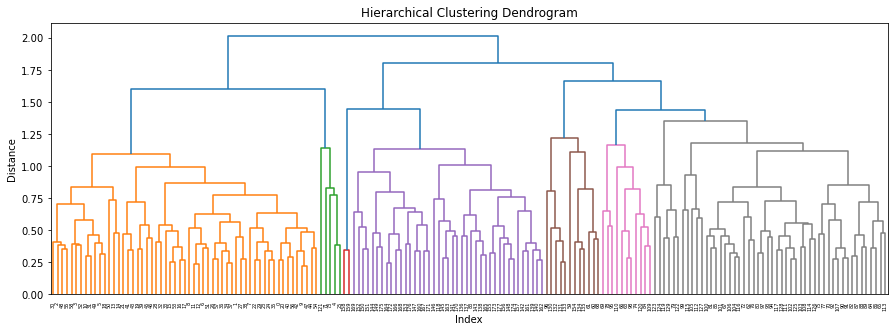

In [6]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch
 # for creating dendrogram 
#p = np.array(df_norm) # converting into numpy array format 
z = linkage(df_norm, method="complete",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(z)
plt.show()

In [7]:
from sklearn.cluster import AgglomerativeClustering 
h_complete = AgglomerativeClustering(n_clusters=7, linkage='complete',affinity = "euclidean").fit(df_norm) 

cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
wine['clust']=cluster_labels 
wine

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clust
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,4
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,4
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,4
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,4
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


In [8]:
wine.iloc[:,1:].groupby(wine.clust).mean()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clust
clust,,,,,,,,,,,,,,
0,12.237800,2.037200,2.242800,20.628000,89.540000,2.136800,2.012800,0.381200,1.552600,2.868400,1.068720,2.830200,477.060000,0
1,12.619167,1.804167,2.232500,18.450000,103.750000,1.745000,0.995000,0.398333,0.871667,4.749167,0.854167,1.605833,610.833333,1
2,12.107273,1.489091,2.152727,18.327273,108.545455,2.786364,2.551818,0.245455,2.412727,3.469091,1.015455,2.954545,660.000000,2
3,13.181463,3.628537,2.436829,21.451220,98.365854,1.651220,0.764878,0.459024,1.117073,7.271219,0.687073,1.736585,622.853659,3
4,13.765789,1.999825,2.434912,16.828070,105.824561,2.844561,2.992807,0.285088,1.900351,5.583684,1.061228,3.161053,1127.403509,4
5,13.910000,1.675000,2.670000,23.750000,93.500000,2.700000,1.205000,0.525000,2.495000,12.375000,0.570000,1.870000,640.000000,5
6,12.940000,1.974000,2.918000,25.900000,117.200000,2.972000,3.240000,0.350000,1.888000,4.126000,1.154000,3.296000,685.000000,6


In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
wine_subset = pd.DataFrame(scaler.fit_transform(wine.iloc[:,1:]))
wine_subset 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,0.915383
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,0.915383
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,0.915383
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,0.915383
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,2.050841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952,0.347654
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893,0.347654
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575,0.347654
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498,0.347654


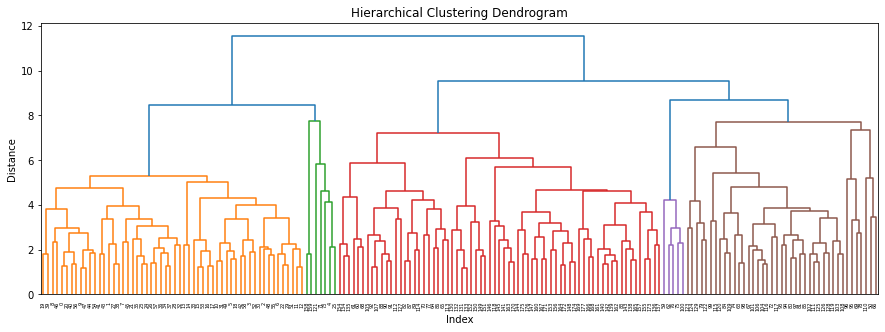

In [10]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch # for creating dendrogram 
#p = np.array(df_norm) # converting into numpy array format 
z = linkage(wine_subset, method="complete",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(
    z,
    #leaf_rotation=0.,  # rotates the x axis labels
    #leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [11]:
from sklearn.cluster import AgglomerativeClustering 
h_complete = AgglomerativeClustering(n_clusters=6, linkage='complete',affinity = "euclidean").fit(wine_subset) 

cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
wine['clust']=cluster_labels # creating a  new column and assigning it to new column 
wine

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clust
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,4
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,4
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,4
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,4
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


In [12]:
#PCA

In [13]:
import pandas as pd 
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 

In [14]:
wine1=pd.read_csv("wine.csv")
wine.describe()
wine1.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [15]:
wine1.data = wine1.iloc[:,1:]
wine1.data.head()



<ipython-input-15-edf91d1f7bc2>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  wine1.data = wine1.iloc[:,1:]


,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [16]:
wine2 = wine1.data.values
wine2

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [17]:
wine1_normal = scale(wine2)

In [18]:
wine1_normal

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [19]:
pca = PCA(n_components = 13)
pca_values = pca.fit_transform(wine1_normal)
pca_values 

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01, ...,
        -4.51563395e-01,  5.40810414e-01, -6.62386309e-02],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00, ...,
        -1.42657306e-01,  3.88237741e-01,  3.63650247e-03],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01, ...,
        -2.86672847e-01,  5.83573183e-04,  2.17165104e-02],
       ...,
       [-2.67783946e+00, -2.76089913e+00, -9.40941877e-01, ...,
         5.12492025e-01,  6.98766451e-01,  7.20776948e-02],
       [-2.38701709e+00, -2.29734668e+00, -5.50696197e-01, ...,
         2.99821968e-01,  3.39820654e-01, -2.18657605e-02],
       [-3.20875816e+00, -2.76891957e+00,  1.01391366e+00, ...,
        -2.29964331e-01, -1.88787963e-01, -3.23964720e-01]])

In [20]:
pca.components_

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
        -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
         0.27923515,  0.16449619, -0.36490283],
       [-0.20738262,  0.08901289,  0.6262239 ,  0.61208035,  0.13075693,
         0.14617896,  0.1506819 ,  0.17036816,  0.14945431, -0.13730621,
         0.08522192,  0.16600459, -0.12674592],
       [-0.0178563 ,  0.53689028, -0.21417556,  0.06085941, -0.35179658,
         0.19806835,  0.15229479, -0.20330102,  0.39905653,  0.06592568,
        -0.42777141,  0.18412074, -0.23207086],
       [-0.26566365,  0.03521363, -0.14302547,  0.06610294,  0.72704851,
        -0.14931841, -0.10902584, -0.50070298,  0.13685982, -0.07643678,
        -0.17361452, -0.10116099, -0.1578688 ],
       [-0.21353865, -0.536813

In [21]:
var = pca.explained_variance_ratio_
var

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

In [22]:
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([ 36.2 ,  55.41,  66.53,  73.6 ,  80.16,  85.1 ,  89.34,  92.02,
        94.24,  96.17,  97.91,  99.21, 100.01])

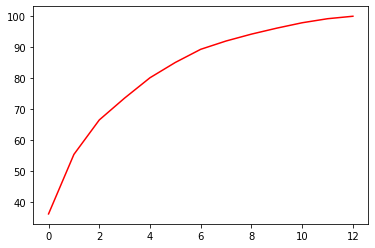

In [23]:
plt.plot(var1,color="red")

#The number of clusters are same in both H cluster and pca method

In [25]:
 pca_values[:,0:3]

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01],
       [ 3.75706561e+00, -2.75637191e+00, -1.76191842e-01],
       [ 1.00890849e+00, -8.69830821e-01,  2.02668822e+00],
       [ 3.05025392e+00, -2.12240111e+00, -6.29395827e-01],
       [ 2.44908967e+00, -1.17485013e+00, -9.77094891e-01],
       [ 2.05943687e+00, -1.60896307e+00,  1.46281883e-01],
       [ 2.51087430e+00, -9.18070957e-01, -1.77096903e+00],
       [ 2.75362819e+00, -7.89437674e-01, -9.84247490e-01],
       [ 3.47973668e+00, -1.30233324e+00, -4.22735217e-01],
       [ 1.75475290e+00, -6.11977229e-01, -1.19087832e+00],
       [ 2.11346234e+00, -6.75706339e-01, -8.65086426e-01],
       [ 3.45815682e+00, -1.13062988e+00, -1.20427635e+00],
       [ 4.31278391e+00, -2.09597558e+00, -1.26391275e+00],
       [ 2.30518820e+00, -1.66255173e+00,  2.17902616e-01],
       [ 2.17195527e+00, -2.32730534e+00

In [26]:
finalDf = pd.concat([pd.DataFrame(pca_values[:,0:3],columns=['pc1','pc2','pc3']), wine1[['Type']]], axis = 1)
finalDf

,pc1,pc2,pc3,Type
0,3.316751,-1.443463,-0.165739,1
1,2.209465,0.333393,-2.026457,1
2,2.516740,-1.031151,0.982819,1
3,3.757066,-2.756372,-0.176192,1
4,1.008908,-0.869831,2.026688,1
...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,3
174,-2.601956,-1.757229,0.207581,3
175,-2.677839,-2.760899,-0.940942,3
176,-2.387017,-2.297347,-0.550696,3


<AxesSubplot:xlabel='pc1', ylabel='pc2'>

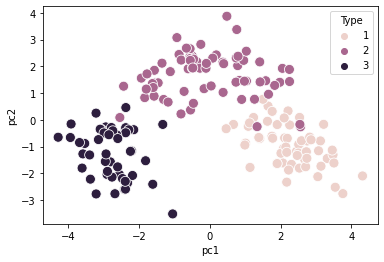

In [27]:
import seaborn as sns
sns.scatterplot(data=finalDf,x='pc1',y='pc2',hue='Type',s = 100)  

<AxesSubplot:xlabel='pc2', ylabel='pc3'>

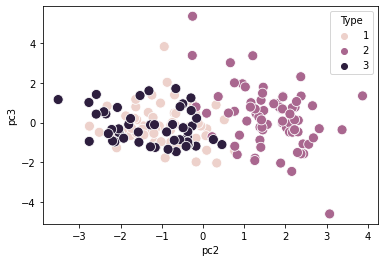

In [28]:
import seaborn as sns
sns.scatterplot(data=finalDf,x='pc2',y='pc3',hue='Type',s = 100)  

<AxesSubplot:xlabel='pc1', ylabel='pc3'>

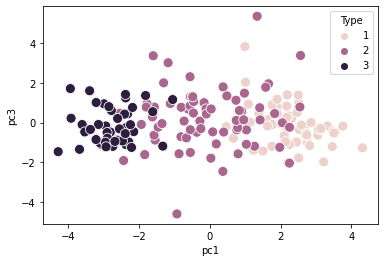

In [29]:
import seaborn as sns
sns.scatterplot(data=finalDf,x='pc1',y='pc3',hue='Type',s = 100)  

In [ ]:
#H clustering using pca values

In [30]:
finalDf

,pc1,pc2,pc3,Type
0,3.316751,-1.443463,-0.165739,1
1,2.209465,0.333393,-2.026457,1
2,2.516740,-1.031151,0.982819,1
3,3.757066,-2.756372,-0.176192,1
4,1.008908,-0.869831,2.026688,1
...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,3
174,-2.601956,-1.757229,0.207581,3
175,-2.677839,-2.760899,-0.940942,3
176,-2.387017,-2.297347,-0.550696,3


In [33]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [34]:
df_norm1 = norm_func(finalDf.iloc[:,1:])
df_norm1

,pc2,pc3,Type
0,0.280447,0.445028,0.0
1,0.520989,0.257653,0.0
2,0.336264,0.560688,0.0
3,0.102712,0.443975,0.0
4,0.358103,0.665806,0.0
...,...,...,...
173,0.175825,0.427221,1.0
174,0.237971,0.482621,1.0
175,0.102099,0.366964,1.0
176,0.164852,0.406262,1.0


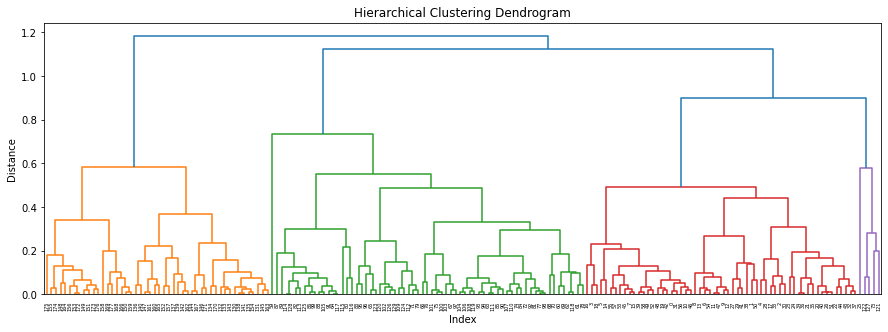

In [45]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch
 # for creating dendrogram 
#p = np.array(df_norm) # converting into numpy array format 
z = linkage(df_norm1, method="complete",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(
    z,
    #leaf_rotation=0.,  # rotates the x axis labels
    #leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [46]:
from sklearn.cluster import AgglomerativeClustering 
h_complete = AgglomerativeClustering(n_clusters=4, linkage='complete',affinity = "euclidean").fit(df_norm) 

cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
finalDf['clust']=cluster_labels # creating a  new column and assigning it to new colum
finalDf

,pc1,pc2,pc3,Type,clust
0,3.316751,-1.443463,-0.165739,1,0
1,2.209465,0.333393,-2.026457,1,0
2,2.516740,-1.031151,0.982819,1,0
3,3.757066,-2.756372,-0.176192,1,0
4,1.008908,-0.869831,2.026688,1,0
...,...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,3,2
174,-2.601956,-1.757229,0.207581,3,2
175,-2.677839,-2.760899,-0.940942,3,2
176,-2.387017,-2.297347,-0.550696,3,2


In [47]:
finalDf.iloc[:,1:].groupby(finalDf.clust).mean()

,pc2,pc3,Type,clust
clust,,,,
0,-0.913893,0.020300,1.048387,0
1,1.787298,0.258901,2.000000,1
2,-1.319941,-0.108659,2.953488,2
3,0.366133,-1.031605,2.583333,3


In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
finalDf_subset = pd.DataFrame(scaler.fit_transform(finalDf.iloc[:,1:]))
finalDf_subset 

,0,1,2,3
0,-0.913479,-0.137826,-1.213944,-1.109417
1,0.210984,-1.685165,-1.213944,-1.109417
2,-0.652552,0.817294,-1.213944,-1.109417
3,-1.744339,-0.146518,-1.213944,-1.109417
4,-0.550463,1.685357,-1.213944,-1.109417
...,...,...,...,...
173,-1.402553,-0.284875,1.373864,1.048793
174,-1.112043,0.172621,1.373864,1.048793
175,-1.747204,-0.782470,1.373864,1.048793
176,-1.453850,-0.457949,1.373864,1.048793


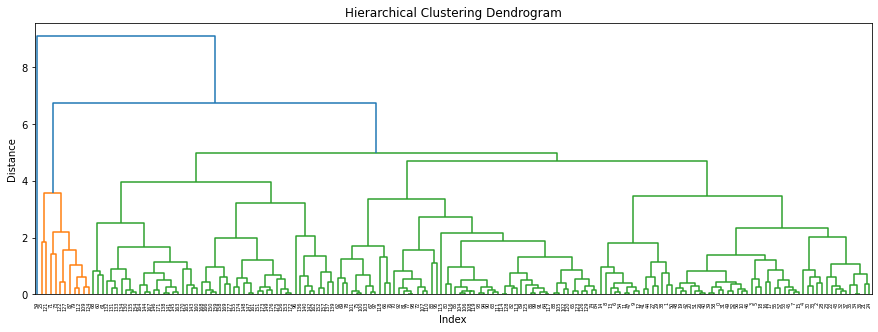

In [49]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch # for creating dendrogram 
#p = np.array(df_norm) # converting into numpy array format 
z = linkage(finalDf_subset, method="complete",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(
    z,
    #leaf_rotation=0.,  # rotates the x axis labels
    #leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [53]:
from sklearn.cluster import AgglomerativeClustering 
h_complete = AgglomerativeClustering(n_clusters=3, linkage='complete',affinity = "euclidean").fit(finalDf_subset) 

cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
finalDf['clust']=cluster_labels # creating a  new column and assigning it to new column 
finalDf

,pc1,pc2,pc3,Type,clust
0,3.316751,-1.443463,-0.165739,1,0
1,2.209465,0.333393,-2.026457,1,0
2,2.516740,-1.031151,0.982819,1,0
3,3.757066,-2.756372,-0.176192,1,0
4,1.008908,-0.869831,2.026688,1,0
...,...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,3,0
174,-2.601956,-1.757229,0.207581,3,0
175,-2.677839,-2.760899,-0.940942,3,0
176,-2.387017,-2.297347,-0.550696,3,0


In [54]:
finalDf.iloc[:,1:7].groupby(finalDf.clust).mean()

,pc2,pc3,Type,clust
clust,,,,
0,-0.069391,-0.154471,1.939759,0
1,3.073486,-4.585064,2.000000,1
2,0.767766,2.747930,1.909091,2
